In [ ]:
# color based ---

# k-means ---

# contours ---

# thresholding ....

#--------------------------------------------------------# 

In [ ]:
import cv2 
import numpy as np 
from google.colab.patches import cv2_imshow

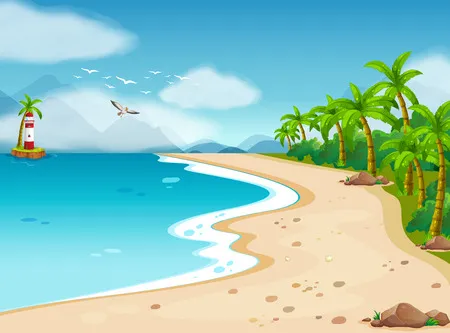

In [ ]:
img_org = cv2.imread("/content/itsohk.webp")
cv2_imshow(img_org)

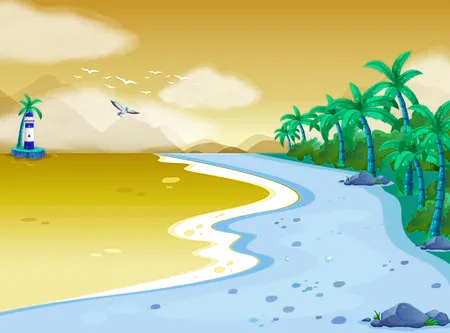

In [ ]:
img = cv2.imread("/content/itsohk.webp")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
cv2_imshow(img)

In [ ]:
transformed = img.reshape((-1,3))
transformed = np.float32(transformed)

In [ ]:
k=4
attempts = 10
crtieria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER , 10 ,1.0)


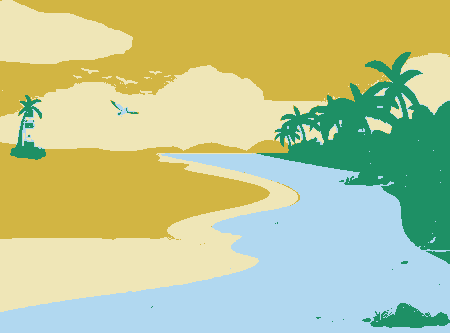

In [ ]:
ret, label , center = cv2.kmeans(transformed, k, None, crtieria, attempts, cv2.KMEANS_PP_CENTERS)

center = np.uint8(center)
result = center[label.flatten()]


result_img = result.reshape((img.shape))

cv2_imshow(result_img)

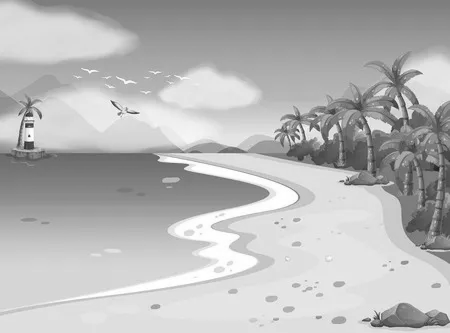

In [ ]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

cv2_imshow(gray)

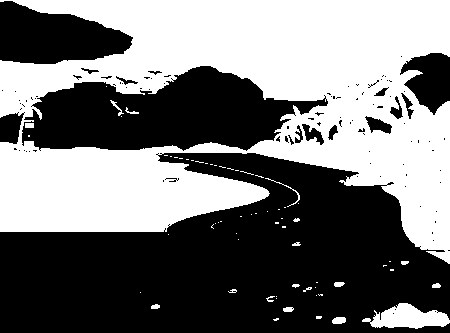

In [ ]:
_,thresh = cv2.threshold(gray, np.mean(gray), 255, cv2.THRESH_BINARY_INV)

cv2_imshow(thresh)

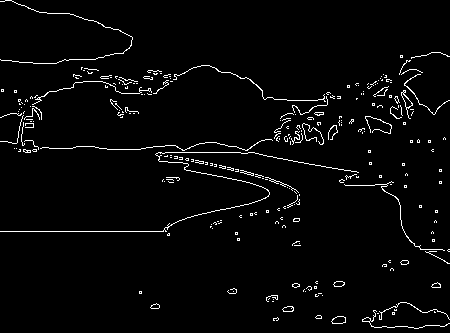

In [ ]:
edges = cv2.Canny(thresh,0,255)
cv2_imshow(edges)

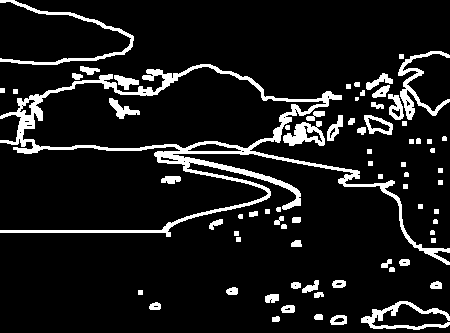

In [ ]:
dilated = cv2.dilate(edges,None)
cv2_imshow(dilated)

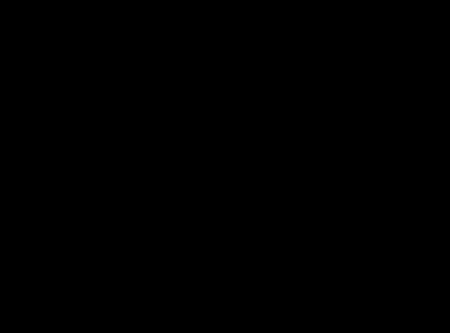

In [ ]:
cnt = sorted(cv2.findContours(dilated, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]

mask = np.zeros((gray.shape[0],gray.shape[1]), np.uint8)

masked = cv2.drawContours(mask, [cnt],-1, 0, -1)

cv2_imshow(masked)

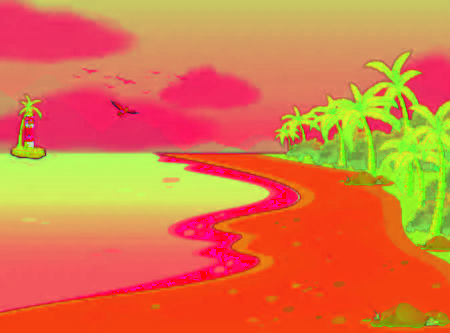

In [ ]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

cv2_imshow(hsv_img)

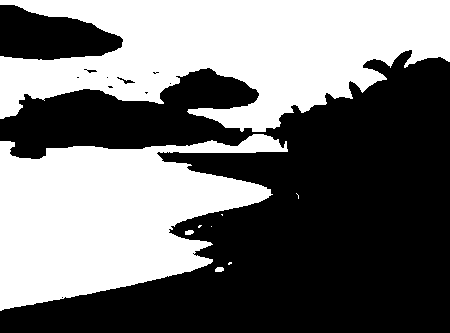

In [ ]:
light_blue = (90, 70, 50)
dark_blue = (128, 255, 255)

light_green = (40, 40, 40)
dark_greek = (70, 255, 255)

mask = cv2.inRange(hsv_img, light_blue, dark_blue)

cv2_imshow(mask)

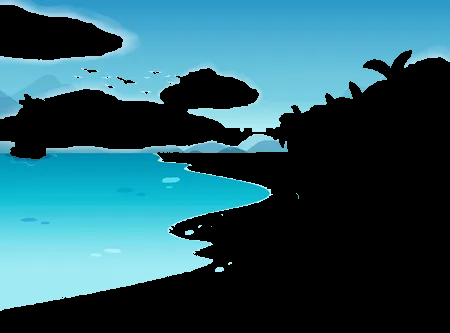

In [ ]:
result = cv2.bitwise_and(img_org, img_org, mask=mask)
cv2_imshow(result)

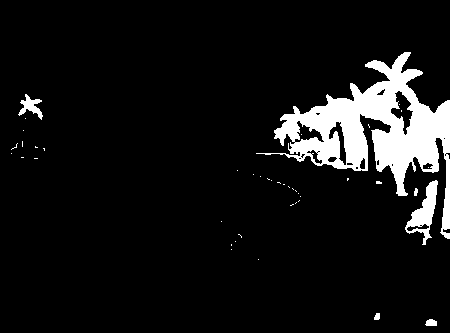

In [ ]:
mask = cv2.inRange(hsv_img, light_green, dark_greek)

cv2_imshow(mask)

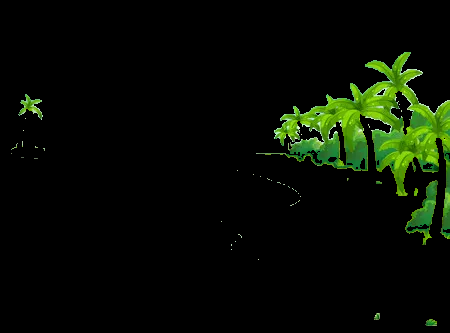

In [ ]:
result = cv2.bitwise_and(img_org, img_org, mask=mask)
cv2_imshow(result)